In [844]:
_="""
we are going to create a simple deep neural network (DNN) 
also called a simple classification(logistic regression) model with one neurone

we'll use sigmoid function as activation function 
Z = W.T * X + b

Z : is a parameter
W : is the weight 
b : is the bias 
X : a matrix (n, m) that represents the features or DNN inputs 

g(Z) = (1 / (1 + exp(-Z))) is a form of activation function

loss = - ( (1-y) * log(1-g) + y * log(g) ) is the loss function 
<< binary cross entropy >> usually used for binary classification issues

L = (1/m) * sum(loss) is the cost function use to compute 
the gradient 

grad(O) = dL/dO is the gradient form
with O = (W, b)

dg = dL/dg = (g-y)/(1-g)

dg/dz = (1-g) 

dz/db = 1

dz/dw = X

# back propagation based on gradient descent 
dw = dg * (dg/dz) * (dz/dw) = (1/m) *  X * ( g - a).T
db = dg * (dg/dz) * (dz/db) = (1/m) * sum(g - a )

d_epsilon = loss[l] - loss[l-1]

as hyperparameters we need:
* learning_rate = 0.01
* number of layers in this case 1 layer (NL = 1) with one neurone
* shape is the dimension in features
* max_iter = 5000 for iterations to reach to the convergence of until the 
* epsilon = 1e-4
variation of gradient become smaller (dgrad < epsilon) where epsilon is the tolerence
in this case we'll use while loop to be sure that we reach to the convergence (local minimum is found)

shape = X.shape = (n, m)

to build a DNN with a single neurone as below we need to initialize W and b to zeros 

(inputs)
  X1 \   (neurone)   
  X2  ------ O ------> y(output) 
  X3 /

params = {'b' : np.zeros((NL, 1)), 'W' : np.zeros((1, n)) }
then after initaliazing parameters we can compute the rest of functions

while d_epsion > epsilon:
    Z       = params["W"].dot(X) + params['b']
    g       = (1.0 / (1.0 + np.exp(-Z)))
    loss    = - ( (1-y) * log(1-g) + y * log(g) )
    cost    = - (1/m) * ( (1-y) * log(1-g) + y * log(g) ).sum(axis=1)

    # back propagation 
    params['W'] = params['W'] - learning_rate * dgrad/dW
    params['b'] = params['b'] - learning_rate * dgrad/db

"""

In [845]:
# numerical modules importation 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [846]:
def metrics(y_pred, y_test):
    # computing accuracy of the simple model
    accuracy = (y_pred == y_test ).sum() / y_pred.shape[1]
    
    return accuracy

In [847]:
# building activation function 

def sigmoid(X : np.ndarray ):
    """
    As explained previously for activation function 
    we are going to use sigmoid one 

    sigmoid  = (1 / (1 + np.exp(-X)))
    """
    sig = 1 / (1.0 + np.exp(-X) )
    return sig


In [848]:
# params intialization 

def Params(layers_size : list, NL : int = 1, r_type='zero'):
    """
    layers_size contains the size of the input features and the size of the classification layer
    NL is the number of the layers
    """
    params = {}
    np.random.seed(50)
    for i in range(1, NL+1):
        if r_type == 'zero':
            params[f'W{i}'] = np.zeros((layers_size[i], layers_size[i-1])) 
        elif r_type == 'random':
            params[f'W{i}'] = np.random.randn(layers_size[i], layers_size[i-1])
        else: pass 
        #
        if NL == 1:  params[f'b{i}'] = 0.0
        else: params[f'b{i}'] = np.zeros((layers_size[i], 1))
    
    return params

In [849]:
# computing the back propagation

def back_propagation(X : np.ndarray, Y : np.ndarray, params : dict):
    m = X.shape[1]

    # bias and weight 
    b, W = params['b1'], params['W1']

    Z = W.dot(X) + b
    
    # sigmoid compute
    G = sigmoid(X=Z)
    # cost function 
    #cost = -(1.0 / m ) * (Y * np.log(G) + (1-Y) * np.log(1 - G)).sum(axis=1)
    cost = -(1.0 / m ) * ( ( Y * np.log(G) ) + (1 - Y) * np.log(1 - G) ).sum(axis=1)
    #cost = np.squeeze( np.array( cost ) )

    # computing gradient components 
    dw = (1. / m) * X.dot( (G - Y).T )
    db = ( G - Y ).mean(axis = 1)[0]

    grads = (dw, db)
    
    return grads, cost[0]

In [850]:
def model_prediction(X:np.ndarray, params:dict= {}):
    # prediction we will use sigmoid function 
    W, b            = params["W1"], params['b1']
    Z               = W.dot( X ) + b
    G               = sigmoid(X=Z)
    # Y prediction initialized to zeros
    Y_prediction    = np.zeros(G.shape) 

    for i in range(G.shape[1]):
        for j in range(G.shape[0]):
            if G[j, i] > 0.5  : Y_prediction[j, i] = 1.0 
            else: pass 

    return Y_prediction

In [851]:
def model(X: np.ndarray, Y: np.ndarray, 
      params : dict = {}, learning_rate:float = 1e-3, 
      epsilon : float = 1e-3, Y_test = [], X_test = [],
      print_val : bool = False ):
    
      
      grads, cost        = back_propagation (X=X, Y=Y, params=params)
      max_iter_, costs   = [], []
      index              = 0
      score              = []

      while True:#for i in range(max_iter):
            # propagate bias and weight 
            params['W1'] = params['W1'] - learning_rate *  grads[0].T
            params['b1'] = params['b1'] - learning_rate *  grads[1]
            
            # back forward propagation 
            grads, cost = back_propagation (X=X, Y=Y, params=params)
            # prediction
            Y_pred      = model_prediction(X=X_test, params=params)
            # computing the confidence score (accuracy)
            s           = metrics(y_pred=Y_pred, y_test=Y_test)

            # storing data compute
            score.append(s)
            costs.append(cost)
            max_iter_.append(index)
            
            
            if index == 0: pass
            else:
                  # condition to break the while loop 
                  d_epsilon = np.abs( costs[index] - costs[index-1] )
                  if d_epsilon < epsilon : 
                        print("\nGood  job we reach to the convergence. Local minimum found")
                        break
                  else: pass 
            
            # print data at each 10 step
            if print_val is True:
                  if index % 10 == 0:
                        if cost not in [np.nan]:
                              print(f"cost function : {cost} : interation : {index} ")
                        else: break
                  else: pass 
            else: pass 

            index += 1
      
      return params, costs, max_iter_, score

In [852]:
# let's take an example of load_breast_cancer of sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split as tts 

#loading cancer dataset
X, y = load_breast_cancer(return_X_y=True)
# data processing 
x_train, x_test, y_train, y_test = tts(X, y, random_state=50, shuffle=True, test_size=0.1)
# reshape data
y_train, y_test = y_train.reshape((1, -1)), y_test.reshape((1, -1))
x_train, x_test = x_train.reshape((30, -1)), x_test.reshape((30, -1))

# defining the layer dimension
layers_size, NL = [30, 1], 1

# params np.zeros initialization 
params = Params(layers_size=layers_size, NL=NL, r_type='zero')

# training the model
params, costs, max_iter, score = model(X=x_train, Y=y_train, 
                params=params, print_val=True, Y_test=y_test,
                epsilon=3e-6, learning_rate=1e-6, X_test=x_test
                )

cost function : 0.691040050120489 : interation : 0 
cost function : 0.6779245200181454 : interation : 10 
cost function : 0.6721181402109271 : interation : 20 
cost function : 0.6690040067736038 : interation : 30 
cost function : 0.6670093985855876 : interation : 40 
cost function : 0.6655515572740718 : interation : 50 
cost function : 0.6643919617134864 : interation : 60 
cost function : 0.6634216200961647 : interation : 70 
cost function : 0.6625844707315072 : interation : 80 
cost function : 0.6618481001926071 : interation : 90 
cost function : 0.6611917393867155 : interation : 100 
cost function : 0.6606009604713741 : interation : 110 
cost function : 0.6600651346267593 : interation : 120 
cost function : 0.6595761027912188 : interation : 130 
cost function : 0.659127417892563 : interation : 140 
cost function : 0.6587138773803519 : interation : 150 
cost function : 0.6583312150827567 : interation : 160 
cost function : 0.657975887249264 : interation : 170 
cost function : 0.657644

Text(0, 0.5, 'cost')

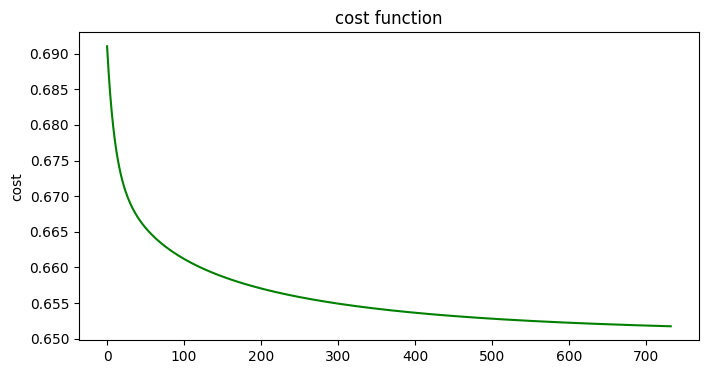

In [863]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))

ax.plot(costs, color='g')
ax.set_title('cost function')
ax.set_ylabel("cost")


In [854]:
print(f"accuracy : {score[-1]}")

accuracy : 0.631578947368421
